In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, grangercausalitytests


In [2]:
datadf = pd.read_csv('ind.csv', index_col="Series Name")
datadf.head()

,M2-LCU,M2-%GDP,GDP-per-capita-US$,GDP-US$,GDP-growth-%,Government-expenditure-%GDP,Government-expenditure-US$
Series Name,,,,,,,
1960,8.173208e+09,22.07,82.19,3.702988e+10,NaN,6.57,2.434156e+09
1961,8.435708e+09,21.50,85.35,3.923244e+10,3.72,6.89,2.704945e+09
1962,9.246309e+09,21.93,89.88,4.216148e+10,2.93,7.78,3.279987e+09
1963,1.022491e+10,21.12,101.13,4.842192e+10,5.99,8.71,4.215148e+09
1964,1.118671e+10,19.81,115.54,5.648029e+10,7.45,8.04,4.542440e+09


In [3]:
df = datadf[["M2-LCU","Government-expenditure-US$","GDP-US$"]].rename(columns={"M2-LCU":"M2","Government-expenditure-US$":"GE","GDP-US$":"GDP"})
df = df.apply(np.log)
df.head()

,M2,GE,GDP
Series Name,,,
1960,22.824127,21.612866,24.334991
1961,22.855740,21.718348,24.392770
1962,22.947490,21.911105,24.464773
1963,23.048093,22.161951,24.603219
1964,23.137992,22.236730,24.757158


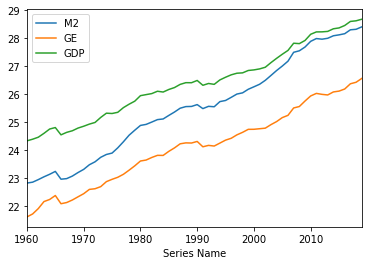

In [4]:
df.plot()

In [5]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items() :
        result['Critical Value (%s)'%key] = value
    print (result)
    
    print("At 5% significance level")
    if result['p-value'] < abs(result['Critical Value (5%)']):
        print ("Reject Ho - Time Series is Stationary")
        return (False)
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
        return (True)

In [6]:
def take_diff(timeseries) :
    diff = timeseries - timeseries.shift(1)
    return diff

In [7]:
def make_stationary(timeseries):
    diff_timeseries = timeseries.copy(deep=True)
    while(adf_test(diff_timeseries)):
        diff_timeseries = take_diff(diff_timeseries).dropna()
        
    return diff_timeseries

In [8]:
df['M2_s'] = make_stationary(df['M2'])
df['GE_s'] = make_stationary(df['GE'])
df['GDP_s'] = make_stationary(df['GDP'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.137718
p-value                         0.945550
#Lags Used                      2.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
At 5% significance level
Reject Ho - Time Series is Stationary
Results of Dickey-Fuller Test:
Test Statistic                 -0.320899
p-value                         0.922492
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64
At 5% significance level
Reject Ho - Time Series is Stationary
Results of Dickey-Fuller Test:
Test Statistic                  0.350253
p-value                         0.979536
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Valu

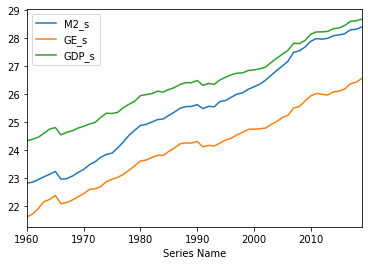

In [9]:
df[["M2_s","GE_s","GDP_s"]].plot()

In [10]:
granger_m2 = grangercausalitytests(df[['GDP_s','M2_s']], maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4523  , p=0.0139  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=6.7980  , p=0.0091  , df=1
likelihood ratio test: chi2=6.4340  , p=0.0112  , df=1
parameter F test:         F=6.4523  , p=0.0139  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3544  , p=0.0425  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=7.3417  , p=0.0255  , df=2
likelihood ratio test: chi2=6.9128  , p=0.0315  , df=2
parameter F test:         F=3.3544  , p=0.0425  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6239  , p=0.0191  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=12.3939 , p=0.0061  , df=3
likelihood ratio test: chi2=11.2146 , p=0.0106  , df=3
parameter F test:         F=3.6239  , p=0.0191  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1098  , p=0.0238  , df_d

In [11]:
granger_result = grangercausalitytests(df[['GDP_s','GE_s']], maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4519  , p=0.5042  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.4761  , p=0.4902  , df=1
likelihood ratio test: chi2=0.4742  , p=0.4911  , df=1
parameter F test:         F=0.4519  , p=0.5042  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3891  , p=0.6796  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=0.8516  , p=0.6532  , df=2
likelihood ratio test: chi2=0.8454  , p=0.6553  , df=2
parameter F test:         F=0.3891  , p=0.6796  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0757  , p=0.1153  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=7.0988  , p=0.0688  , df=3
likelihood ratio test: chi2=6.6903  , p=0.0825  , df=3
parameter F test:         F=2.0757  , p=0.1153  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6649  , p=0.0438  , df_d